In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('cleaned_cs.csv')
df['pdata_clean']=df['pdata_clean'].astype(str)
df


,file_name,page_number,title,summary,page_data,published,pdata_clean
0,paper_cs_1.pdf,1,Mathematical Logic in Computer Science,The article retraces major events and milest...,arXiv:1802.03292v1 [cs.LO] 7 Feb 2018Mathema...,2018-02-07T22:21:43Z,matmatical logic uter science as af four jun...
1,paper_cs_1.pdf,2,Mathematical Logic in Computer Science,The article retraces major events and milest...,2 Areas of Mathematical Logic and How Far They...,2018-02-07T22:21:43Z,areas matmatical logic how far ty extend matma...
2,paper_cs_1.pdf,3,Mathematical Logic in Computer Science,The article retraces major events and milest...,"relationship with database theory , acquires a...",2018-02-07T22:21:43Z,likewise later and it is pointless exercise to...
3,paper_cs_1.pdf,4,Mathematical Logic in Computer Science,The article retraces major events and milest...,"four major ones, and to consider its impact on...",2018-02-07T22:21:43Z,for its w it ichom hirc tre so t that just mic...
4,paper_cs_1.pdf,5,Mathematical Logic in Computer Science,The article retraces major events and milest...,3 ‘On the Unusual Eﬀectiveness of Logic in Com...,2018-02-07T22:21:43Z,o logic uter science t that t siptive lexity l...
...,...,...,...,...,...,...,...
4694,paper_cs_200.pdf,18,Tracing monadic computations and representing ...,"In functional programming, monads are suppos...",Maciej Pir ´og & Jeremy Gibbons 107\n[11] Matt...,2012-02-14T03:01:53Z,ribbons maw nnessy gordoplot kifull abstras...
4695,paper_cs_200.pdf,19,Tracing monadic computations and representing ...,"In functional programming, monads are suppos...",108 Tracing monadic computations and represent...,2012-02-14T03:01:53Z,traci proof nest sefree free for nest proty...
4696,paper_cs_200.pdf,20,Tracing monadic computations and representing ...,"In functional programming, monads are suppos...",Maciej Pir ´og & Jeremy Gibbons 109\n=ffunctor...,2012-02-14T03:01:53Z,ribbons fg proof nest re nest sens ...
4697,paper_cs_200.pdf,21,Tracing monadic computations and representing ...,"In functional programming, monads are suppos...",110 Tracing monadic computations and represent...,2012-02-14T03:01:53Z,traci urmg mf to t urt fg mg mg mg mg mg...


In [3]:
df1= df.drop(["page_data","summary","page_number","file_name","title"], axis = 1)
df1

,published,pdata_clean
0,2018-02-07T22:21:43Z,matmatical logic uter science as af four jun...
1,2018-02-07T22:21:43Z,areas matmatical logic how far ty extend matma...
2,2018-02-07T22:21:43Z,likewise later and it is pointless exercise to...
3,2018-02-07T22:21:43Z,for its w it ichom hirc tre so t that just mic...
4,2018-02-07T22:21:43Z,o logic uter science t that t siptive lexity l...
...,...,...
4694,2012-02-14T03:01:53Z,ribbons maw nnessy gordoplot kifull abstras...
4695,2012-02-14T03:01:53Z,traci proof nest sefree free for nest proty...
4696,2012-02-14T03:01:53Z,ribbons fg proof nest re nest sens ...
4697,2012-02-14T03:01:53Z,traci urmg mf to t urt fg mg mg mg mg mg...


In [4]:
df.isnull().sum()

file_name      0
page_number    0
title          0
summary        0
page_data      0
published      0
pdata_clean    0
dtype: int64

In [5]:
import pandas as pd
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from gensim.models import LdaModel
import re

#function to preprocess text
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  #non-alphabet characters removed
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]

    unigrams = words
    bigrams = [' '.join(phrase) for phrase in list(ngrams(words, 2))]
    
    return unigrams, bigrams  #return both unigrams and bigrams


#preprocessing of data
df['unigrams'], df['bigrams'] = zip(*df['pdata_clean'].apply(preprocess_text))

#dictionary for unigrams
dictionary_unigrams = corpora.Dictionary(df['unigrams'])
corpus_unigrams = [dictionary_unigrams.doc2bow(text) for text in df['unigrams']]

#train the LDA model for unigrams
lda_model_unigrams = LdaModel(corpus_unigrams, num_topics=10, id2word=dictionary_unigrams, passes=15)

#dictionary for bigrams
dictionary_bigrams = corpora.Dictionary(df['bigrams'])
corpus_bigrams = [dictionary_bigrams.doc2bow(text) for text in df['bigrams']]

#train the LDA model for bigrams
lda_model_bigrams = LdaModel(corpus_bigrams, num_topics=10, id2word=dictionary_bigrams, passes=15)

#function to get the most significant words for a topic
def get_topic_words(model, dictionary, topic):
    topic_words = [word for word, prob in model.show_topic(topic, topn=10) if word not in ['agents','agent','ai', 'intelligence','artificial intelligence','cial intelligence','artificial','arti cial','phys rev','phys',]]  # Adjust topn as needed
    return topic_words

#extract 3 unigram topics and 2 bigram topics
df['unigram_topics'] = df['unigrams'].apply(lambda x: get_topic_words(lda_model_unigrams, dictionary_unigrams, lda_model_unigrams[dictionary_unigrams.doc2bow(x)][0][0]))
df['bigram_topics'] = df['bigrams'].apply(lambda x: get_topic_words(lda_model_bigrams, dictionary_bigrams, lda_model_bigrams[dictionary_bigrams.doc2bow(x)][0][0]))

#combine the topics into a single column
df['topics'] = df.apply(lambda row: row['unigram_topics'][:3] + row['bigram_topics'][:2], axis=1)

df.to_csv('topics_cs_lda.csv', index=False)


In [6]:
df.drop(["page_number","title","summary", "page_data"], axis=1)


,file_name,published,pdata_clean,unigrams,bigrams,unigram_topics,bigram_topics,topics
0,paper_cs_1.pdf,2018-02-07T22:21:43Z,matmatical logic uter science as af four jun...,"[matmatical, logic, uter, science, af, four, j...","[matmatical logic, logic uter, uter science, s...","[science, uter, intellence, conference, logic,...","[data science, articial intellence, ief ops, c...","[science, uter, intellence, data science, arti..."
1,paper_cs_1.pdf,2018-02-07T22:21:43Z,areas matmatical logic how far ty extend matma...,"[areas, matmatical, logic, far, ty, extend, ma...","[areas matmatical, matmatical logic, logic far...","[science, uter, intellence, conference, logic,...","[uter science, articial intellence, new york, ...","[science, uter, intellence, uter science, arti..."
2,paper_cs_1.pdf,2018-02-07T22:21:43Z,likewise later and it is pointless exercise to...,"[likewise, later, pointless, exercise, try, ma...","[likewise later, later pointless, pointless ex...","[intellence, articial, learni, ph, machine, on...","[uter science, articial intellence, new york, ...","[intellence, articial, learni, uter science, a..."
3,paper_cs_1.pdf,2018-02-07T22:21:43Z,for its w it ichom hirc tre so t that just mic...,"[w, ichom, hirc, tre, michael, raida, richard,...","[w ichom, ichom hirc, hirc tre, tre michael, m...","[intellence, articial, learni, ph, machine, on...","[uter science, articial intellence, new york, ...","[intellence, articial, learni, uter science, a..."
4,paper_cs_1.pdf,2018-02-07T22:21:43Z,o logic uter science t that t siptive lexity l...,"[logic, uter, science, siptive, lexity, logic,...","[logic uter, uter science, science siptive, si...","[bell, quantum, bob, alice, meics, tse, tre, r...","[uter science, articial intellence, new york, ...","[bell, quantum, bob, uter science, articial in..."
...,...,...,...,...,...,...,...,...
4694,paper_cs_200.pdf,2012-02-14T03:01:53Z,ribbons maw nnessy gordoplot kifull abstras...,"[ribbons, maw, nnessy, gordoplot, kifull, abst...","[ribbons maw, maw nnessy, nnessy gordoplot, go...","[intellence, articial, learni, ph, machine, on...","[uter science, articial intellence, new york, ...","[intellence, articial, learni, uter science, a..."
4695,paper_cs_200.pdf,2012-02-14T03:01:53Z,traci proof nest sefree free for nest proty...,"[traci, proof, nest, sefree, free, nest, proty...","[traci proof, proof nest, nest sefree, sefree ...","[bell, quantum, bob, alice, meics, tse, tre, r...","[ph ds, si si, data science, tau bee, page ran...","[bell, quantum, bob, ph ds, si si]"
4696,paper_cs_200.pdf,2012-02-14T03:01:53Z,ribbons fg proof nest re nest sens ...,"[ribbons, fg, proof, nest, nest, sens, nas, ur...","[ribbons fg, fg proof, proof nest, nest nest, ...","[bell, quantum, bob, alice, meics, tse, tre, r...","[articial intellence, th ue, nest nest, mat sc...","[bell, quantum, bob, articial intellence, th ue]"
4697,paper_cs_200.pdf,2012-02-14T03:01:53Z,traci urmg mf to t urt fg mg mg mg mg mg...,"[traci, urmg, mf, urt, fg, mg, mg, mg, mg, mg,...","[traci urmg, urmg mf, mf urt, urt fg, fg mg, m...","[ti, ms, dijkstra, edge, color, si, zd, mat, i...","[articial intellence, unrstandi quantum, quant...","[ti, ms, dijkstra, articial intellence, unrsta..."


In [7]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_unigrams, corpus_unigrams, dictionary=dictionary_unigrams)
vis

c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.246921 -0.142134       1        1  43.231587
3     -0.206108  0.125171       2        1  17.399004
1     -0.186659  0.061739       3        1  13.290428
5     -0.065568  0.027289       4        1   8.273420
0      0.041358 -0.164861       5        1   5.160370
2      0.133113  0.126430       6        1   3.372131
6      0.118734  0.102192       7        1   3.228861
7      0.126897 -0.069079       8        1   2.597842
4      0.132677 -0.041147       9        1   2.102428
8      0.152478 -0.025600      10        1   1.343928, topic_info=            Term         Freq        Total Category  logprob  loglift
1578     quantum  7314.000000  7314.000000  Default  30.0000  30.0000
742         data  1275.000000  1275.000000  Default  29.0000  29.0000
39       science  2078.000000  2078.000000  Default  28.0000  28.0000
45          uter  1177.000000  1177.000000  Default  27.0000  27.0000
17    intellence  3227.000000  3227.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1953        note    22.497556   197.956494  Topic10  -5.0547   2.1349
1536         set    19.083272   204.461229  Topic10  -5.2193   1.9380
6728          vp     9.380109    25.154333  Topic10  -5.9295   3.3231
2125         ose     7.833975    21.253221  Topic10  -6.1096   3.3115
329          usi    10.947378   441.185114  Topic10  -5.7750   0.6132

[633 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
10230     10  0.791616        abs
17877      3  0.996175  advantage
1031       1  0.929164         al
1031       2  0.041779         al
1031       3  0.001671         al
...      ...       ...        ...
3140       9  0.975811         zd
6403       4  0.970571    zealand
17158      5  0.909570      zelog
3694       5  0.981970    zermelo
16958      8  0.978656        zsa

[1275 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 2, 6, 1, 3, 7, 8, 5, 9])

In [8]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_bigrams, corpus_bigrams, dictionary=dictionary_bigrams)
vis

c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and wil

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.261207  0.037420       1        1  39.770584
3      0.070618  0.228684       2        1  17.484227
7      0.022598 -0.048225       3        1   9.768325
9      0.029140 -0.028139       4        1   6.117312
5      0.025242 -0.034186       5        1   5.852655
4      0.028048 -0.038451       6        1   4.548169
2      0.019812 -0.024914       7        1   4.377689
0      0.022787 -0.033456       8        1   4.200756
8      0.020104 -0.027121       9        1   4.073616
1      0.022858 -0.031611      10        1   3.806666, topic_info=                            Term         Freq        Total Category  logprob  \
88339          unrstandi quantum  1677.000000  1677.000000  Default  30.0000   
88575  quantum technologiquantum  1326.000000  1326.000000  Default  29.0000   
4795                 quantum uti   623.000000   623.000000  Default  28.0000   
51                  uter science   615.000000   615.000000  Default  27.0000   
4            articial intellence  3593.000000  3593.000000  Default  26.0000   
...                          ...          ...          ...      ...      ...   
2194                data science    13.859321   193.237174  Topic10  -6.5623   
11936                torem torem     6.197264    20.420750  Topic10  -7.3671   
30647                   pas year     5.335963    10.921631  Topic10  -7.5168   
4            articial intellence     9.033479  3593.780950  Topic10  -6.9903   
15608                new zealand     4.769805    26.455728  Topic10  -7.6289   

       loglift  
88339  30.0000  
88575  29.0000  
4795   28.0000  
51     27.0000  
4      26.0000  
...        ...  
2194    0.6335  
11936   2.0760  
30647   2.5521  
4      -2.7176  
15608   1.5552  

[467 rows x 6 columns], token_table=       Topic      Freq              Term
term                                    
8732       2  0.396375          acad sci
8732       3  0.594563          acad sci
3758       1  0.912515       ag articial
3758       2  0.020278       ag articial
3758       3  0.040556       ag articial
...      ...       ...               ...
77332      3  0.985778            xu pre
8731       1  0.442649            ys rev
8731       2  0.561824            ys rev
58707      4  0.950532          zelog el
7714       5  0.916032  zermelo fraenkel

[621 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 8, 10, 6, 5, 3, 1, 9, 2])

In [9]:
#LSA (Latent Semantic Analysis = finding top ten topics)

from sklearn.feature_extraction.text import CountVectorizer
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD

reindexed_data = df['pdata_clean']

small_count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
small_text_sample = reindexed_data.sample(n=500, random_state=0).values
small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

lsa_model = TruncatedSVD(n_components=10)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [10]:
from collections import Counter 

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [11]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(10):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  quantum unrstandi ty technologiquantum qu uti intellence articial source tre
Topic 2:  fall spri eleive science data studieleive technical free approved sci
Topic 3:  science intellence articial uter journal conference internatnal proceedis data uti
Topic 4:  intellence articial andrew did la lea robert michael concurrent le
Topic 5:  ys ph ed cm sci mater com rev materials new
Topic 6:  source quantum uti add ober nance qu intel uary technology
Topic 7:  just maybe gj char niet nest ste query forms normal
Topic 8:  data science intellence articial rank page tse image trefore table
Topic 9:  ti li calornia table ah cm nb medium edge mat
Topic 10:  wagner ap ge bp wad mler observable lea wis rst


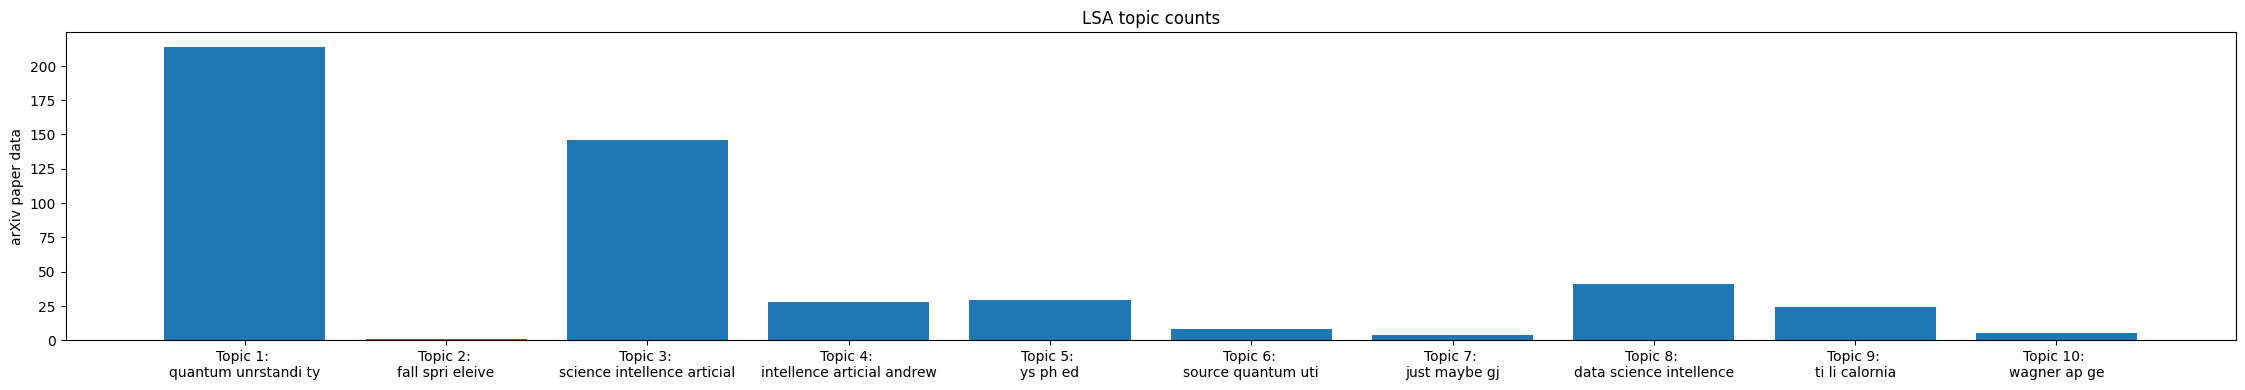

In [12]:
import matplotlib.pyplot as plt

top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i+1) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(28,4))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('arXiv paper data');
ax.set_title('LSA topic counts');
plt.show()


c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


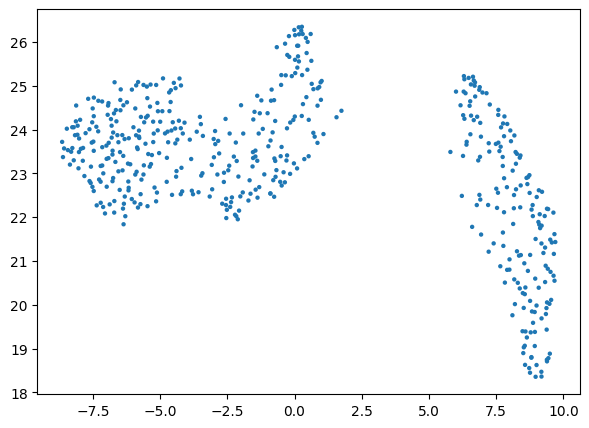

In [13]:
import umap


X_topics = lsa_model.fit_transform(small_document_term_matrix)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],s = 10, # size
edgecolor='none')

plt.show()

In [14]:
import warnings
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the data from CSV
dfx = pd.read_csv('cleaned_cs.csv')
dfx['pdata_clean'] = dfx['pdata_clean'].astype(str)

# Drop unnecessary columns
dfx1 = dfx.drop(["page_data","summary","page_number","file_name","title"], axis=1)
#dfx1 = dfx1.dropna()

# Convert DataFrame to list of strings
docs = dfx1['pdata_clean'].values.tolist()

dfx1["length"] = dfx1["pdata_clean"].apply(lambda x : len(x.split()))

model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=7)
topics, _ = model.fit_transform(dfx1.pdata_clean)


2024-04-28 22:29:41,948 - BERTopic - Embedding - Transforming documents to embeddings.
Batches:  31%|███       | 45/147 [00:44<01:41,  1.01it/s]


KeyboardInterrupt: 

In [ ]:
#top 10 topics
model.get_topic_info().head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1451,-1_science_data_for_intellence,"[science, data, for, intellence, is, articial,...",[internatnal journal uter science telecounicat...
1,0,1522,0_quantum_it_unrstandi_technologiquantum,"[quantum, it, unrstandi, technologiquantum, so...",[unrstandi quantum technologitable miscellaneo...
2,1,99,1_guru_la_sia_mete,"[guru, la, sia, mete, ore, amo, di, sg, or, most]",[eli mi bu via ma lem formal mete lea sia all...
3,2,84,2_data_science_analytics_publicatuary,"[data, science, analytics, publicatuary, surve...",[data science rensive overview data core it ma...
4,3,78,3_mister_rei_for_furtr,"[mister, rei, for, furtr, to, tqm, is, chur, i...",[ne t setogetr t since t since it sesevl for...
5,4,71,4_lea_proof_by_cp,"[lea, proof, by, cp, suppose, zd, since, uk, l...",[preliminary inotth ue lea t lea be proof...
6,5,63,5_nce_articial_intellence_ag,"[nce, articial, intellence, ag, for, xm, is, b...",[t proposit o draft cha it imas articial inte...
7,6,62,6_trefore_tre_fam_for,"[trefore, tre, fam, for, reg, that, by, note, ...","[t tre t , note trefore , with trefore of t i..."
8,7,40,7_citatns_opus_topic_uter,"[citatns, opus, topic, uter, matmatics, sc, li...",[lters year authors venus elds pubrs pas year...
9,8,38,8_security_oud_no_cyber,"[security, oud, no, cyber, yno, secure, privac...",[networki for networki oud uti networki recen...


In [ ]:
model.visualize_barchart(top_n_topics=9)


In [ ]:
model.visualize_term_rank()


In [ ]:
model.visualize_term_rank(log_scale=True)

In [ ]:
model.visualize_topics(top_n_topics=50)


In [ ]:
model.visualize_hierarchy(top_n_topics=50, width=800)


In [ ]:
model.visualize_heatmap(n_clusters=20, top_n_topics=100)


In [ ]:
timestamps = dfx1['published'].values.tolist()
topics_over_time = model.topics_over_time(docs, timestamps)
model.visualize_topics_over_time(topics_over_time, topics=[1,2,3,4,5,6,7,8,9,10])


2024-04-02 13:57:41,827 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 184) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 
0it [00:00, ?it/s]

184it [00:20,  8.88it/s]


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

preprocess_docs = df['pdata_clean'].map(preprocess)


dictionary = gensim.corpora.Dictionary(preprocess_docs)

bow_corpus = [dictionary.doc2bow(doc) for doc in preprocess_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=10)

# Compute Perplexity
# measure of how good the model is. lower Perplexity the better.
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus)) 

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocess_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.303804236049322

Coherence Score:  0.2421382739328309


Setting Number of topics to: 4
Got coherence score of: 0.2321180408077253
Setting Number of topics to: 10
Got coherence score of: 0.20595858501076983
Setting Number of topics to: 16
Got coherence score of: 0.25294581146248374
Setting Number of topics to: 22
Got coherence score of: 0.28486123966153615
Setting Number of topics to: 28
Got coherence score of: 0.3041124367084744
Setting Number of topics to: 34
Got coherence score of: 0.38693863598005185


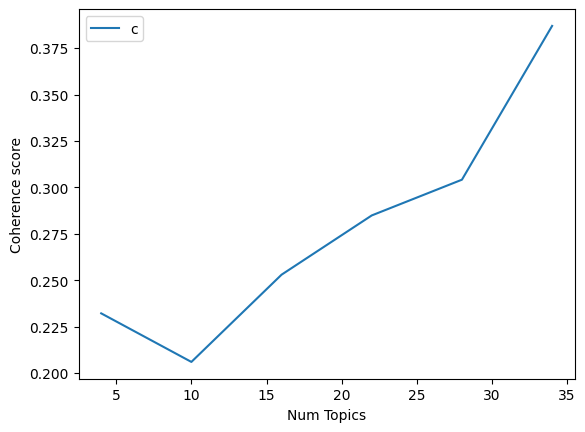

In [ ]:
# Compute Coherence Score
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    
    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    num_topics_list = []  # To store the corresponding num_topics
    for num_topics in range(start, limit, step):
        print('Setting Number of topics to:', num_topics)
        model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=10)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherencemodel.get_coherence()
        coherence_values.append(coherence_score)
        num_topics_list.append(num_topics)  # Store the num_topics value
        print('Got coherence score of:', coherence_score)

    return num_topics_list, coherence_values  # Return both num_topics and coherence values

# Compute coherence values
result = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=preprocess_docs, start=4, limit=40, step=6)

# Unpack result tuple
num_topics_list, coherence_values = result

# Plot coherence values
plt.plot(num_topics_list, coherence_values)  # Use num_topics_list as x-axis
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()